### 1. Further examples of spectral and spectral analysis classes 

The class spectral_analysis, which is used to compute the pairwise coherences inherit for the general class spectral that can be used to filter and compute the wavelet transform of any signal. To instantiate a spectral objetc do:

In [84]:
from GDa.spectral_analysis import spectral, spectral_analysis

In [2]:
spec = spectral()

To illustrate let's read a LFP saved in a .npy file first:


In [3]:
import numpy             as np
import matplotlib.pyplot as plt

data = np.load('raw_lfp/lucy_session01_150304.npy',allow_pickle=True).item()['data']
N    = data.shape[2]   # Number of time points 
fs   = 1000            # Sampling frequency  [Hz]

Next, we will select a random LFP signal in data

In [75]:
lfp = data[15,50,:]

Text(0.5, 1.0, 'Selected LFP')

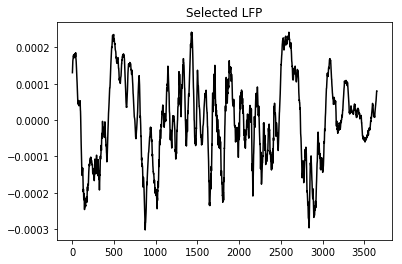

In [76]:
plt.plot(lfp, 'k')
plt.title('Selected LFP')

We can determine its frequency axis with the 'compute_freq' method in spectral:

In [77]:
f = spec.compute_freq(N, fs)

We can bandpass filter the signal with the function 'filter' in spectral:

In [78]:
lfp_filterd = spec.filter(signal = lfp, fs = fs, f_low = 15, f_high = 30, n_jobs = 10)

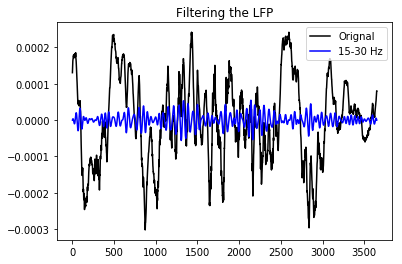

In [79]:
plt.plot(lfp, 'k')
plt.plot(lfp_filterd, 'b')
plt.title('Filtering the LFP')
plt.legend(['Orignal', '15-30 Hz'])

Finally, we can perform a wavelet transform using the 'wavelet_morlet' method:

In [80]:
fmax = 10
W = spec.wavelet_morlet(signal = lfp, fs = fs, fmax=fmax, nfreq=500)

Next, we can visualize the result:

(0, 5)

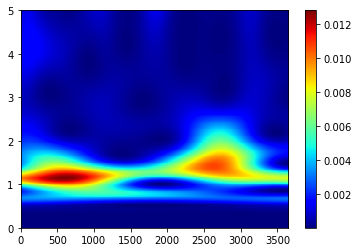

In [82]:
plt.imshow((W*np.conj(W)).real.T, aspect='auto', cmap='jet', origin='lower', extent=[0, N, 0, fmax]); plt.colorbar()
plt.ylim([0,5])

The same can be done using the spectral_analysis class, however it is more focused on the analysis of the LFP object. As shown in notebook (1) we can instantiate the spectral_analysis class with: 

In [86]:
spec2 = spectral_analysis(path = 'raw_lfp/lucy_session01_150304.npy', step = 25, dt = 250, fc = np.arange(6, 62, 2), df = 4)

We can plot the same wavelet transform by doing:

In [88]:
W = spec2.wavelet_morlet(trial = 15, index_channel = 50,  fmax=fmax, nfreq=500)

TypeError: wavelet_morlet() got an unexpected keyword argument 'fmax'